# Analise de Acidentes da Industria

Analise de dados de acidentes industriais da IHM Stefanini

In [3]:
import os
import pandas as pd

## Importação de Dados

In [18]:
data = pd.read_csv(os.path.abspath('../dados.csv'))

data.drop("Unnamed: 0", axis=1, inplace=True)
data.drop("Description", axis=1, inplace=True)

data['Data'] = pd.to_datetime(data['Data'])
data['Year'] = data['Data'].apply(lambda data: data.year)
data['Month'] = data['Data'].apply(lambda data: data.month)
data['Day'] = data['Data'].apply(lambda data: data.day)
data['Weekday'] = data['Data'].apply(lambda date: date.day_name())

data = data[['Data', 'Year', 'Month', 'Day', 'Weekday', 'Countries', 'Local', 'Industry Sector', 'Accident Level', 'Potential Accident Level', 'Genre', 'Employee or Third Party', 'Critical Risk']]
data = data.sort_values(by='Data').reset_index(drop=True)

data.head()

,Data,Year,Month,Day,Weekday,Countries,Local,Industry Sector,Accident Level,Potential Accident Level,Genre,Employee or Third Party,Critical Risk
0,2016-01-01,2016,1,1,Friday,Country_01,Local_01,Mining,I,IV,Male,Third Party,Pressed
1,2016-01-02,2016,1,2,Saturday,Country_02,Local_02,Mining,I,IV,Male,Employee,Pressurized Systems
2,2016-01-06,2016,1,6,Wednesday,Country_01,Local_03,Mining,I,III,Male,Third Party (Remote),Manual Tools
3,2016-01-08,2016,1,8,Friday,Country_01,Local_04,Mining,I,I,Male,Third Party,Others
4,2016-01-10,2016,1,10,Sunday,Country_01,Local_04,Mining,IV,IV,Male,Third Party,Others


## Quais dias da semana é mais comum ter acidentes?

<AxesSubplot:>

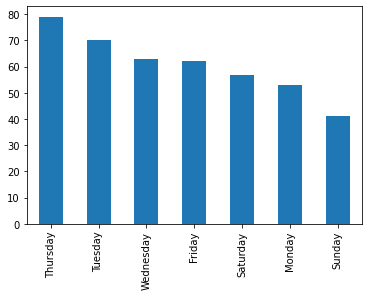

In [20]:
data['Weekday'].value_counts().plot.bar()

### Em que setor é mais comum ter um acidente?

<AxesSubplot:>

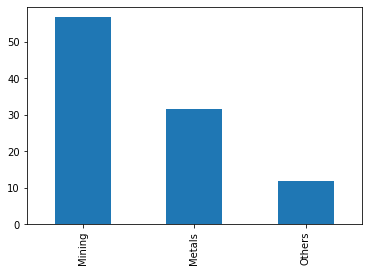

In [24]:
setor = data['Industry Sector'].value_counts(normalize=True) * 100
setor.plot.bar()

### Em qual ano teve mais acidentes?

In [25]:
data['Year'].value_counts()

2016    285
2017    140
Name: Year, dtype: int64

## Devemos utilizar apenas o ano de 2016

In [27]:
data_2016 = data[data['Year'] == 2016]

data_2016

,Data,Year,Month,Day,Weekday,Countries,Local,Industry Sector,Accident Level,Potential Accident Level,Genre,Employee or Third Party,Critical Risk
0,2016-01-01,2016,1,1,Friday,Country_01,Local_01,Mining,I,IV,Male,Third Party,Pressed
1,2016-01-02,2016,1,2,Saturday,Country_02,Local_02,Mining,I,IV,Male,Employee,Pressurized Systems
2,2016-01-06,2016,1,6,Wednesday,Country_01,Local_03,Mining,I,III,Male,Third Party (Remote),Manual Tools
3,2016-01-08,2016,1,8,Friday,Country_01,Local_04,Mining,I,I,Male,Third Party,Others
4,2016-01-10,2016,1,10,Sunday,Country_01,Local_04,Mining,IV,IV,Male,Third Party,Others
...,...,...,...,...,...,...,...,...,...,...,...,...,...
280,2016-12-23,2016,12,23,Friday,Country_01,Local_03,Mining,I,III,Male,Third Party,Others
281,2016-12-26,2016,12,26,Monday,Country_01,Local_06,Metals,I,II,Male,Employee,Others
282,2016-12-28,2016,12,28,Wednesday,Country_02,Local_05,Metals,I,IV,Male,Employee,Others
283,2016-12-30,2016,12,30,Friday,Country_01,Local_04,Mining,IV,V,Male,Third Party,Others


### Em que mês teve mais acidentes?

<AxesSubplot:xlabel='Month'>

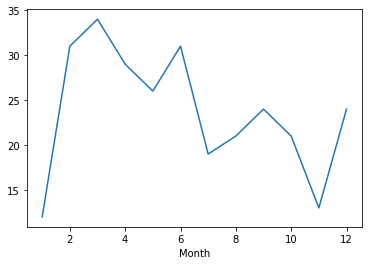

In [29]:
data_2016.groupby(by=['Month'])['Data'].count().plot.line()

### Qual o nivel de acidentes que ocorre?

<AxesSubplot:>

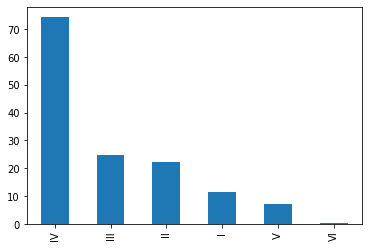

In [32]:
accident_level = data['Accident Level'].value_counts(normalize=True) * 100
accident_level.plot.bar()

<AxesSubplot:>

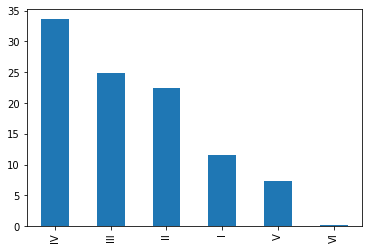

In [33]:
potential_accident_level = data['Potential Accident Level'].value_counts(normalize=True) * 100
potential_accident_level.plot.bar()

<AxesSubplot:>

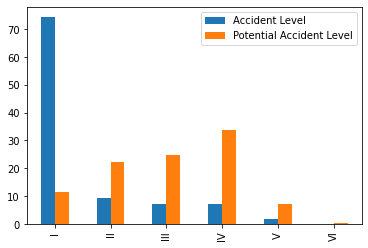

In [36]:
pd.concat([accident_level, potential_accident_level], axis=1, sort=False).fillna(0).plot.bar()

### Qual o risco critico mais comum?

<AxesSubplot:>

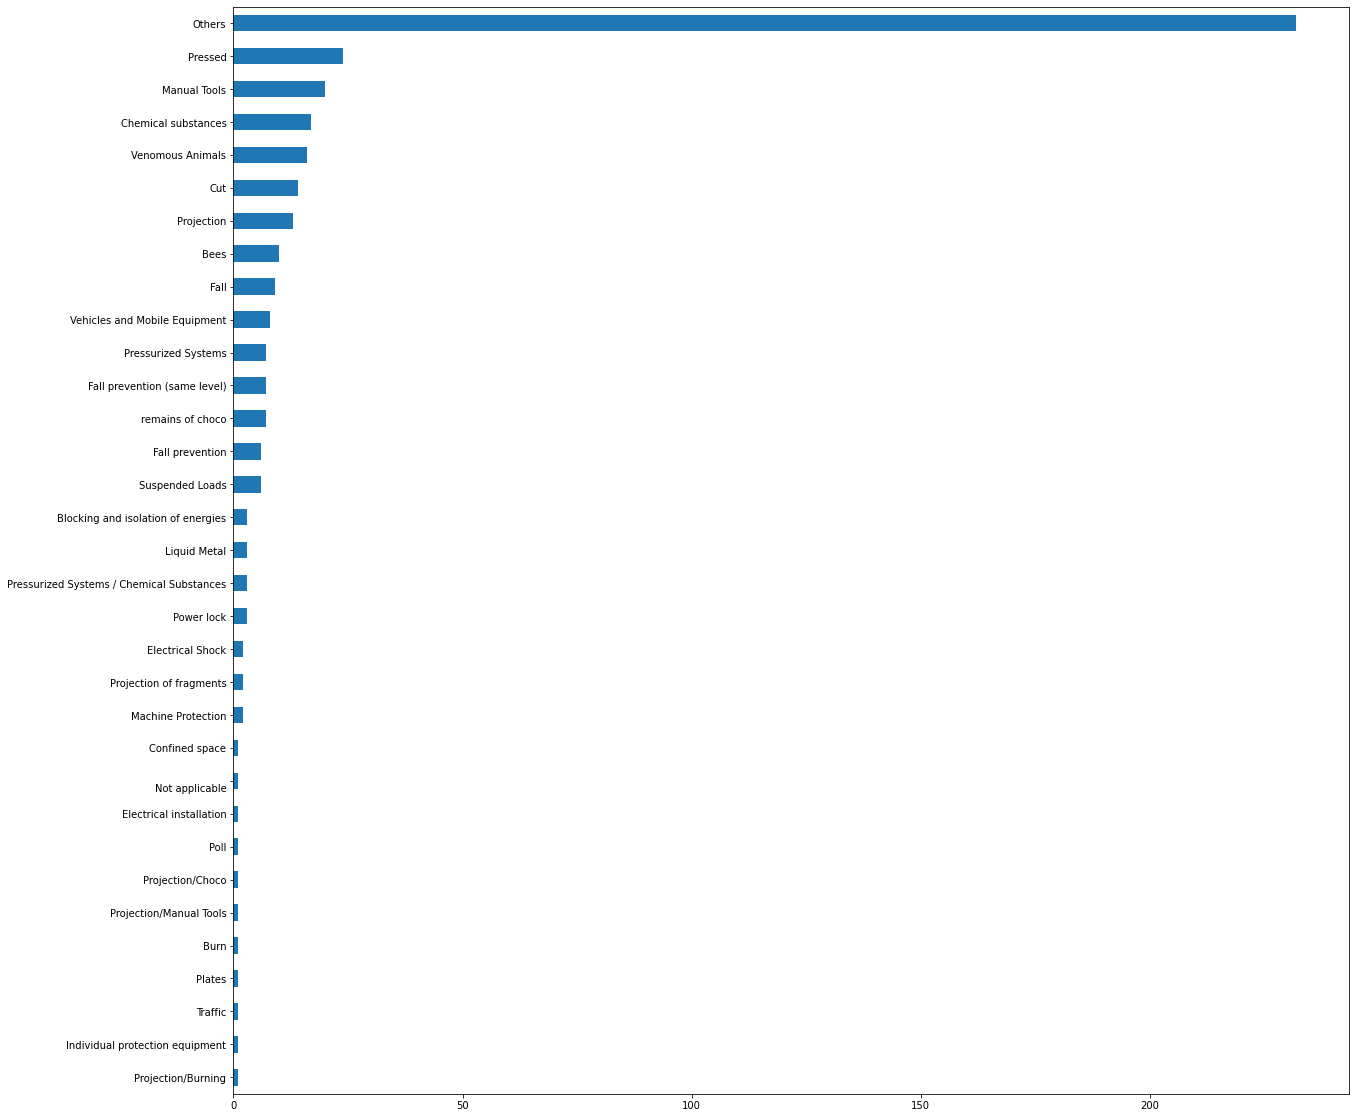

In [41]:
data['Critical Risk'].value_counts().sort_values(ascending=True).plot.barh(figsize=(20, 20))

In [45]:
data.groupby(by=['Critical Risk']).first().filter(items=['Accident Level', 'Potential Accident Level'])

,Accident Level,Potential Accident Level
Critical Risk,,
\nNot applicable,IV,V
Bees,I,I
Blocking and isolation of energies,I,III
Burn,III,IV
Chemical substances,I,II
Confined space,I,III
Cut,I,IV
Electrical Shock,I,IV
Electrical installation,IV,V


### Em qual genero acontecem mais acidentes?

<AxesSubplot:>

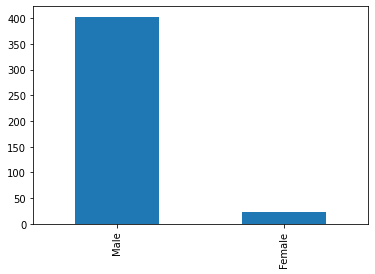

In [47]:
data['Genre'].value_counts().plot.bar()